# Intraseasonal variability in Sea level 

In [160]:
%load_ext ferretmagic

The ferretmagic extension is already loaded. To reload it, use:
  %reload_ext ferretmagic


<img src="Images/Han_paper_title.png" width="600" height="400">
<img src="Images/Han_30_90_Gan.png" width="400" height="400">  

In [196]:
%%ferret
cance data/all
use/order=XYT "Data/AVISO_NIO_1x1deg.nc"
sh d
sh grid ssh

currently SET data sets:
 1> Data/AVISO_NIO_1x1deg.nc (default)
 name title I J K L
 SSH SLA[G=GRD] 1:61 1:33 ... 1:1376
 
 GRID GRP1
 name axis # pts start end subset
 XAX LONGITUDE 61mr 40E 100E full
 YAX LATITUDE 33 r 5S 27N full
 normal Z
 TIME TIME 1376 r 04-JAN-1993 00:00 13-MAY-2019 00:00 full

In [197]:
%%ferret
!let SLA = if SSH ne `SSH,return=bad` then SSH else 999
let SLA = SSH[l=@fln:3,x=@fln:3,y=@fln:3]
let SLA_ffta = ffta(SLA[y=0:20,l=100:1300]) ; let SLA_axis = 1/(t[gt=SLA_ffta])

In [198]:
%%ferret
sh grid SLA_ffta
list 1/60
!define axis/from/name=tlog/T LOG(t[gt=(AX003)])

GRID (G001)
 name axis # pts start end subset
 XAX LONGITUDE 61mr 40E 100E full
 YAX LATITUDE 33 r 5S 27N 21 pts
 normal Z
 (AX002) T (CYC/days) 600 r 1.1905E-04 0.071429 (axis from grid-changing func)
 VARIABLE : 1/60
 0.01667

! Enter_GO land
! Exit_GO


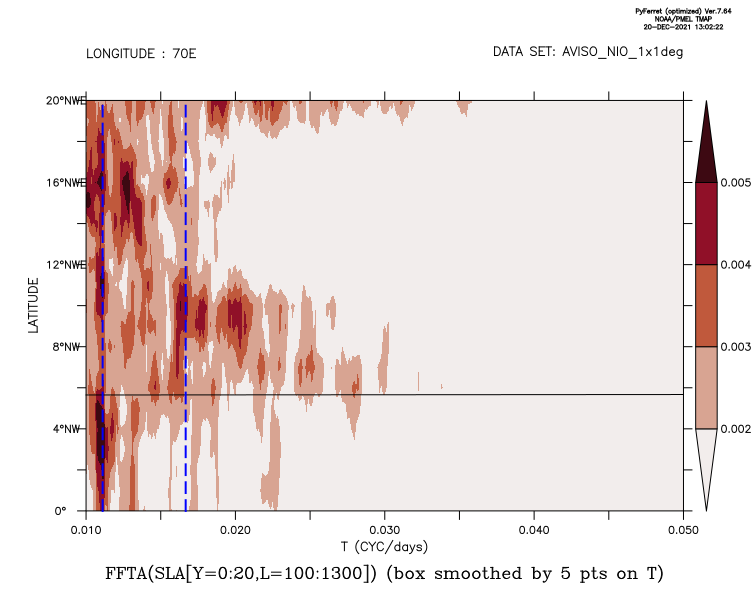

In [206]:
%%ferret
fill/x=70/lev=(-inf)(0.002,0.006,0.001)(inf)/hlimit=0.01:0.05/pal=cmocean_amp SLA_ffta[l=@sbx:5]; go land
plot/over/vs/thick=2/dash/color=blue/nolab {0.01111,0.01111},{0,20}
plot/over/vs/thick=2/dash/color=blue/nolab {0.01667,0.01667},{0,20}

<img src="Images/70deg_AVISO.png" width="600" height="400">

! Enter_GO land
! Exit_GO


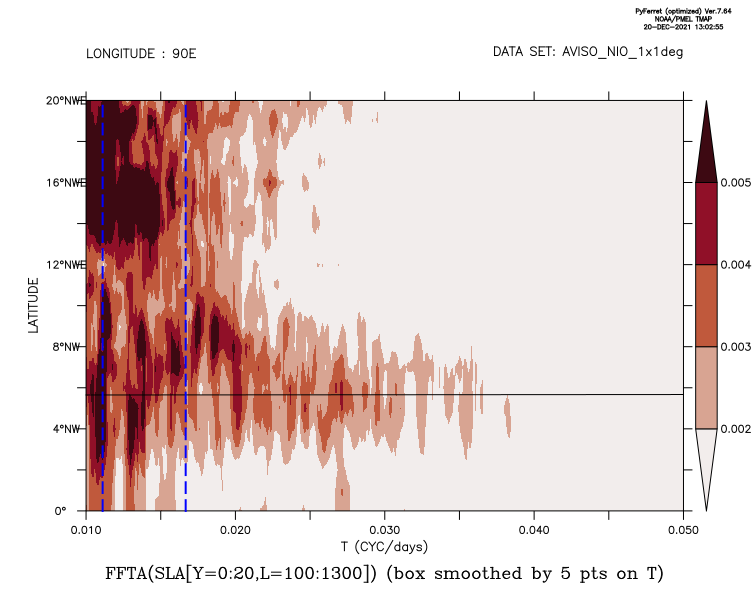

In [210]:
%%ferret
fill/x=90/lev=(-inf)(0.002,0.006,0.001)(inf)/hlimit=0.01:0.05/pal=cmocean_amp SLA_ffta[l=@sbx:5]; go land
plot/over/vs/thick=2/dash/color=blue/nolab {0.01111,0.01111},{0,20}
plot/over/vs/thick=2/dash/color=blue/nolab {0.01667,0.01667},{0,20}

<img src="Images/90deg_AVISO.png" width="600" height="400">

### Sea level observations in the equatorial Indian Ocean
show a primary spectral peak at 90 days and secondary peaks at 30–60 days over the intraseasonal band (20– 90-day period)

# 90 day sea level variability 